In [1]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("talk")
sns.set_style("ticks")
np.random.seed(1337)

In [77]:
kno=[0]
base_path = "/mnt/E/SummerIntern/AAEImages/Known"

In [78]:
! ls

4-WeekReport.pdf
AAE.py
AAE_AE_weights.h5
AAE_Disc_weights.h5
AAE_ED_weights.h5
AAE_Open.ipynb
ADvautoencoder.py
AE.py
AE_AE_weights.h5
AE_weights.h5
Calculate_EVT_Score.ipynb
CheckAAE.ipynb
Check_AE.ipynb
DCGAN
Data
EVT PLots AE.ipynb
Known
Known1_AAE_AE_weights.h5
Known1_AAE_Disc_weights.h5
Known1_AAE_ED_weights.h5
KnownAE[0, 1]recons.txt
KnownAE[0, 1]test_error_kn.txt
KnownAE[0, 1]test_error_per.npy
KnownAE[0, 1]test_error_unk.txt
KnownAE[0, 1]train_error_kn.txt
KnownAE[0, 1]train_error_per.npy
KnownAE[0, 2]recons.txt
KnownAE[0, 2]test_error_kn.txt
KnownAE[0, 2]test_error_per.npy
KnownAE[0, 2]test_error_unk.txt
KnownAE[0, 2]train_error_kn.txt
KnownAE[0, 2]train_error_per.npy
KnownAE[0, 3, 7, 9]recons.txt
KnownAE[0, 3, 7, 9]test_error_kn.txt
KnownAE[0, 3, 7, 9]test_error_per.npy
KnownAE[0, 3, 7, 9]test_error_unk.txt
KnownAE[0, 3, 7, 9]train_error_kn.txt
KnownAE[0, 3, 7, 9]train_error_per.npy
KnownAE[0, 3]recons.txt
KnownAE[0, 3]test_error_kn.txt
KnownAE[0, 3]test_error_per.npy
KnownA

In [79]:
with open("Known"+str(kno)+"train_error_kn.txt","r") as fp:
    train_error_kn = []
    for line in fp:
        for error in line.split():
            train_error_kn.append(np.float64(error))
    train_error_kn = np.array(train_error_kn)
with open("Known"+str(kno)+"test_error_kn.txt","r") as fp:
    test_error_kn = []
    for line in fp:
        for error in line.split():
            if error[-1] == "]":
                continue
            if error[0] == "[":
                error = error[1:-1]
            error = np.float64(error)
            test_error_kn.append(error)
    test_error_kn = np.array(test_error_kn)
with open("Known"+str(kno)+"test_error_unk.txt","r") as fp:
    test_error_unk = []
    for line in fp:
        for error in line.split():
            if error[-1] == "]":
                continue
            if error[0] == "[":
                error = error[1:-1]
            error = np.float64(error)
            test_error_unk.append(error)
    test_error_unk = np.array(test_error_unk)
test_error_per = np.load("Known"+str(kno)+"test_error_per.npy", allow_pickle=True).item()
test_error_per = {
    int(k): np.array([vi[0] if isinstance(vi, list) else vi for vi in v]) for k,v in test_error_per.items()
}
train_error_per = np.load("Known"+str(kno)+"train_error_per.npy", allow_pickle=True).item()
train_error_per = {int(k): np.array(v) for k,v in train_error_per.items()}
test_derr_per = np.load("Known"+str(kno)+"test_derr_per.npy", allow_pickle=True).item()
test_derr_per = {int(k): np.array(v) for k,v in test_derr_per.items()}
test_derr_per = {k: v if len(v.shape) == 1 else v[:, 0] for k,v in test_derr_per.items()}
train_derr_per = np.load("Known"+str(kno)+"train_derr_per.npy", allow_pickle=True).item()
train_derr_per = {int(k): np.array(v) for k,v in train_derr_per.items()}

In [80]:
train_error_kn.shape, test_error_kn.shape, test_error_unk.shape

((5923,), (980,), (63097,))

In [81]:
np.array(test_error_per[2]).shape

(6990,)

In [82]:
for data_dict in [train_error_per, test_error_per, train_derr_per, test_derr_per]:
    for k,v in data_dict.items():
        print(f"{k}={v.shape[0]:05d} [{v.dtype}]", end=",")
    print()
    print("=="*10)

0=05923 [float64],1=00000 [float64],2=00000 [float64],3=00000 [float64],4=00000 [float64],5=00000 [float64],6=00000 [float64],7=00000 [float64],8=00000 [float64],9=00000 [float64],
0=00980 [float64],1=07877 [float64],2=06990 [float64],3=07141 [float64],4=06824 [float64],5=06313 [float64],6=06876 [float64],7=07293 [float64],8=06825 [float64],9=06958 [float64],
0=05923 [float64],1=00000 [float64],2=00000 [float64],3=00000 [float64],4=00000 [float64],5=00000 [float64],6=00000 [float64],7=00000 [float64],8=00000 [float64],9=00000 [float64],
0=00980 [float64],1=07877 [float64],2=06990 [float64],3=07141 [float64],4=06824 [float64],5=06313 [float64],6=06876 [float64],7=07293 [float64],8=06825 [float64],9=06958 [float64],


In [83]:
tmp = np.hstack(list(test_error_per.values()))
print(tmp)
bins=np.histogram(tmp,bins=40)[1]
bins


[0.01288184 0.01809792 0.01465805 ... 0.09589752 0.07085279 0.08545212]


array([0.0063653 , 0.01077886, 0.01519243, 0.01960599, 0.02401955,
       0.02843312, 0.03284668, 0.03726024, 0.04167381, 0.04608737,
       0.05050093, 0.05491449, 0.05932806, 0.06374162, 0.06815518,
       0.07256875, 0.07698231, 0.08139587, 0.08580943, 0.090223  ,
       0.09463656, 0.09905012, 0.10346369, 0.10787725, 0.11229081,
       0.11670438, 0.12111794, 0.1255315 , 0.12994506, 0.13435863,
       0.13877219, 0.14318575, 0.14759932, 0.15201288, 0.15642644,
       0.16084   , 0.16525357, 0.16966713, 0.17408069, 0.17849426,
       0.18290782])

In [84]:
vals=[]
for i in kno:
    vals=np.concatenate((vals,train_error_per[i]))
vals.shape

(5923,)

In [85]:
c, loc, scale = stats.genextreme.fit(vals, loc=vals.mean(), scale=vals.std())
extreme_dist = stats.genextreme(c, loc, scale)
print(extreme_dist.stats("mvsk"))

(array(0.02179622), array(0.00010038), array(1.99947466), array(8.91413259))


In [86]:
c, loc, scale = stats.genextreme.fit(test_error_per[kno[0]], loc=test_error_per[kno[0]].mean(), scale=test_error_per[kno[0]].std())
extreme_dist = stats.genextreme(c, loc, scale)
print(extreme_dist.stats("mvsk"))

(array(0.02229701), array(0.0001156), array(2.17402264), array(10.97095429))


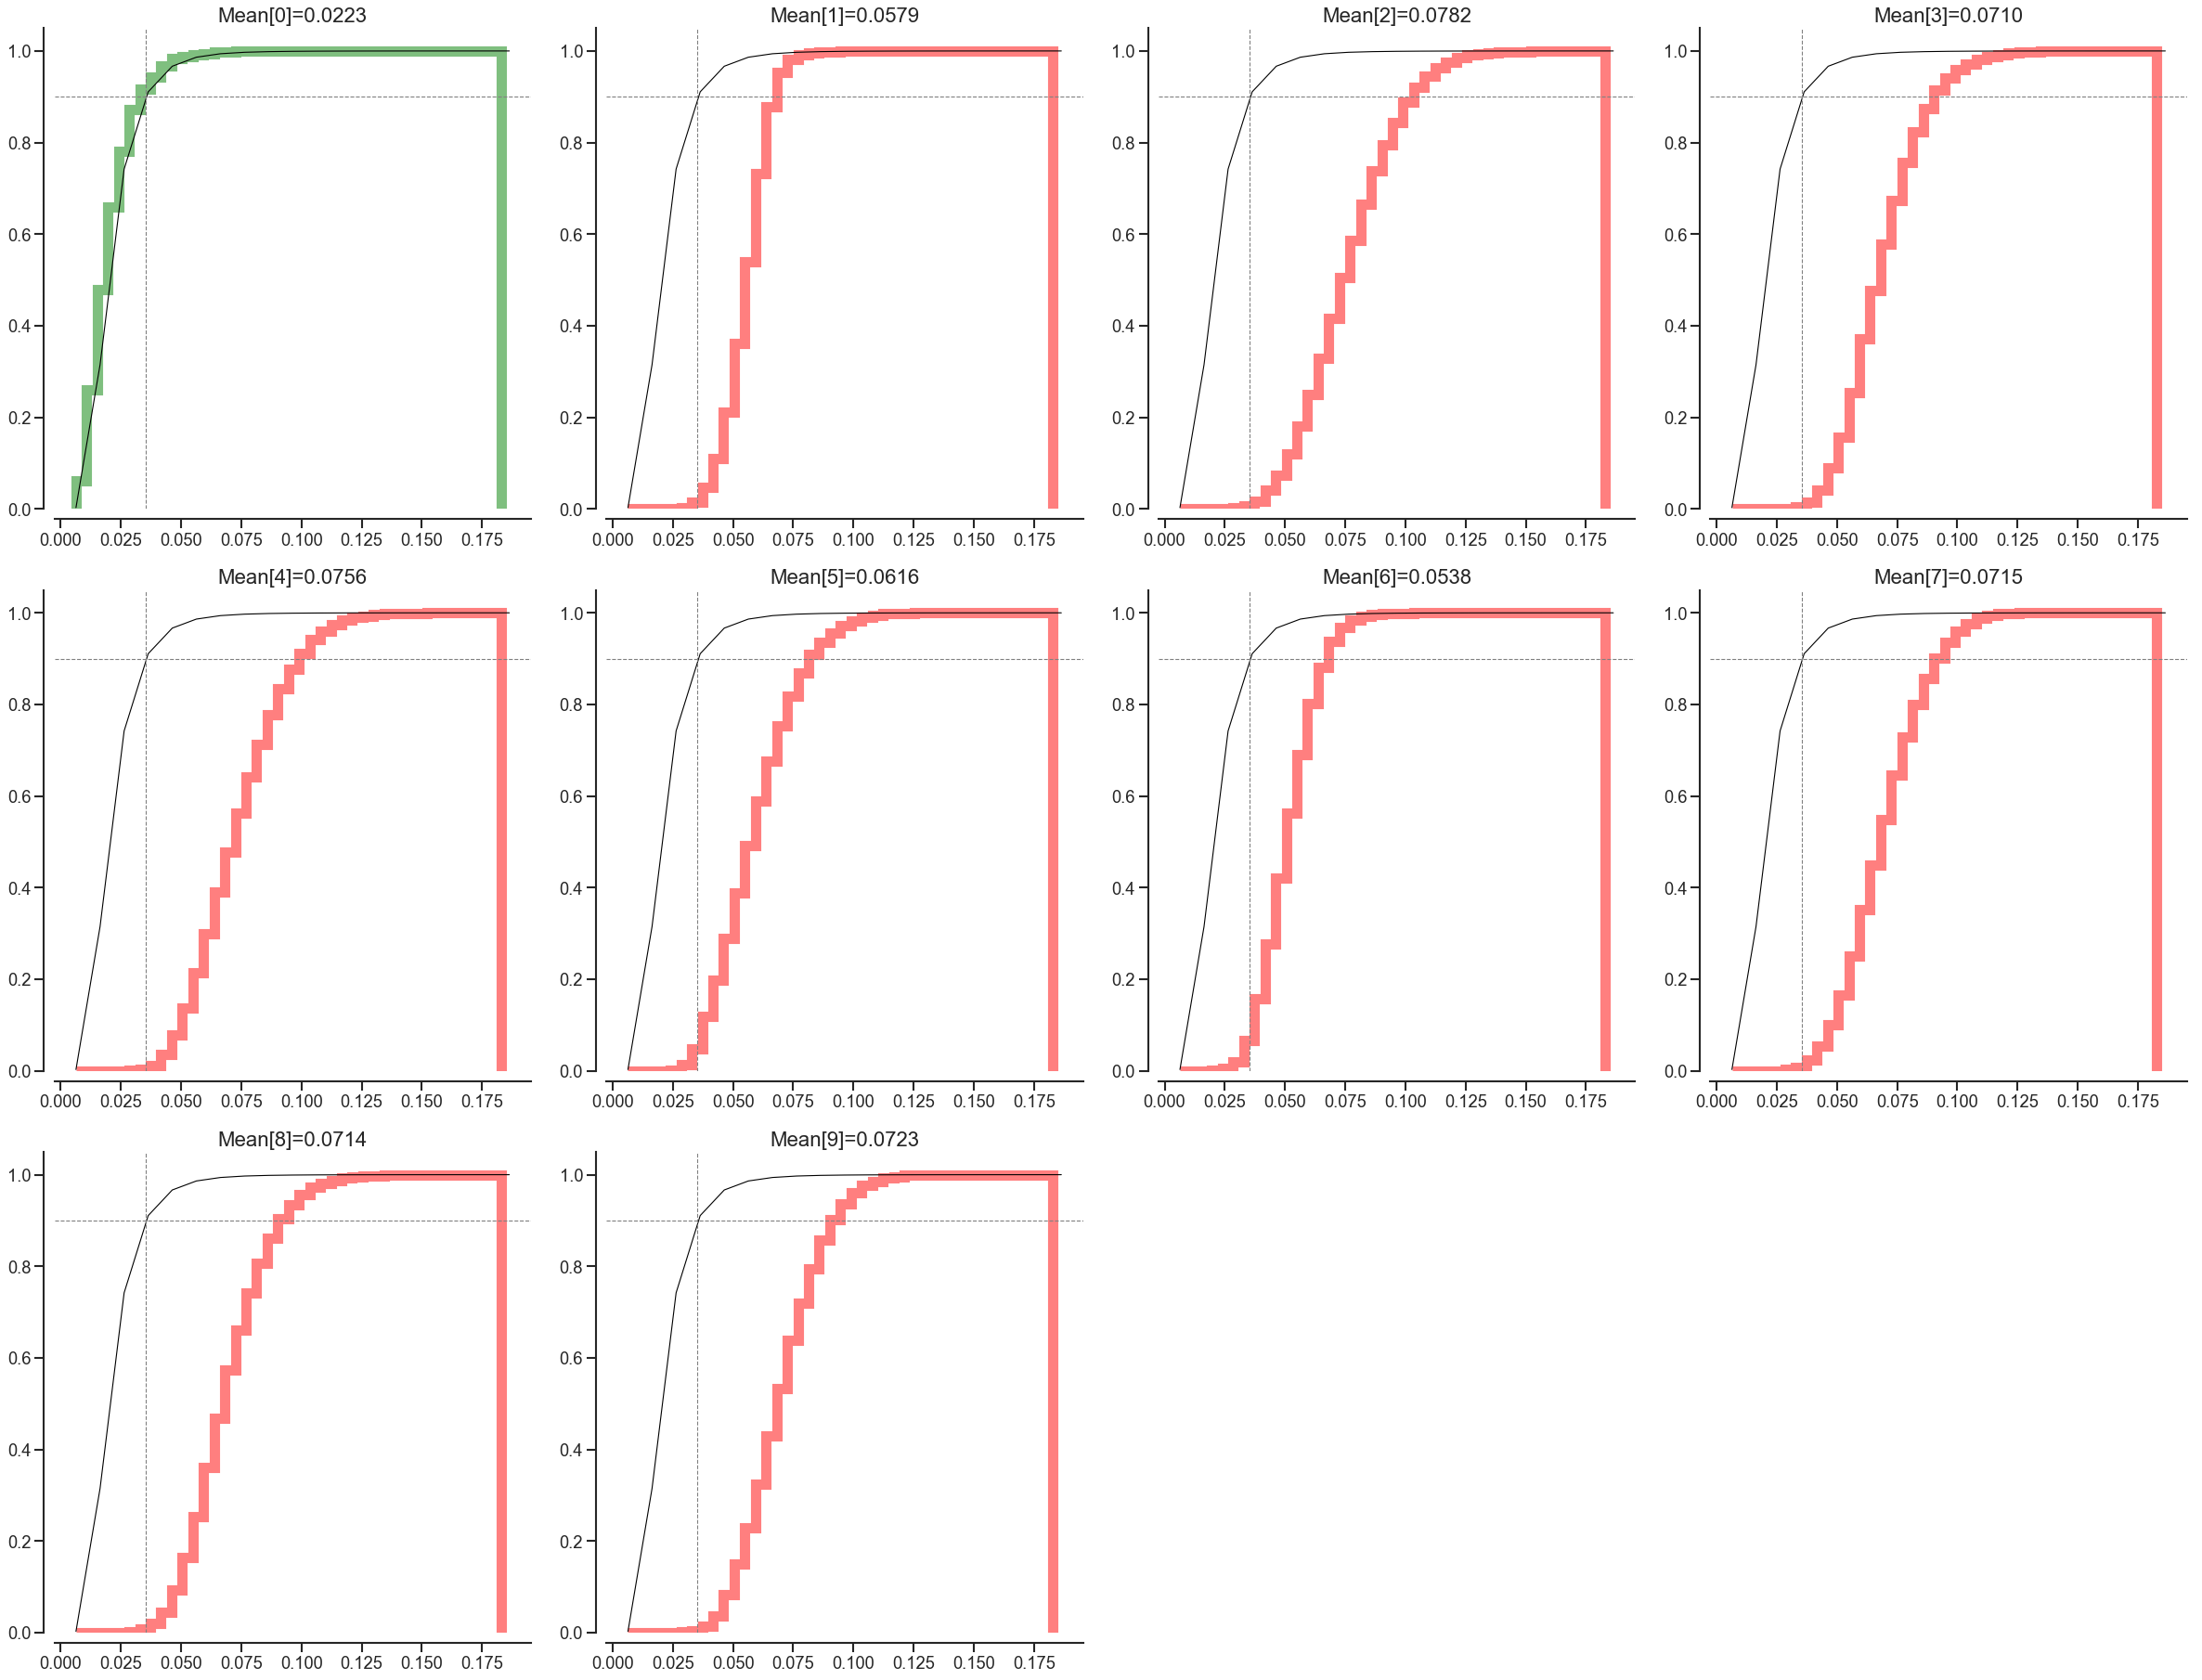

In [87]:
fig=plt.figure(figsize=(30,30),dpi=80)
#ind=['1','2','3','4','6','7','8','9']
ax = None
x = np.arange(bins[0], bins[-1]+0.01, 0.01)
threshhold_cdf = 0.9
threshhold_x = extreme_dist.ppf(threshhold_cdf)
for i in range(10):
    errors=test_error_per[i]
    #errors=np.array(errors) 
    ax=fig.add_subplot(4,4,i+1, sharex=ax, sharey=ax)
    color = "red"
    if i in kno:
        color = "green"
    ax.hist(
        errors, bins, cumulative=True, density=True,
        #weights=np.ones_like(errors)/np.shape(errors)[0], 
        edgecolor=color, linewidth=10, histtype="step", alpha=0.5
    )
    ax.plot(x, extreme_dist.cdf(x), lw=1, color="k")
    ax.axhline(y=threshhold_cdf, lw=1, linestyle="--", color="0.5")
    ax.axvline(x=threshhold_x, lw=1, linestyle="--", color="0.5")
    ax.set_title(f"Mean[{i}]={np.mean(errors):.4f}", fontsize=20)
sns.despine(offset=10)
fig.tight_layout()

In [88]:
extreme_dist.cdf(errors)

array([0.98114897, 0.9948097 , 0.99557552, ..., 0.999176  , 0.99564186,
       0.99841565])

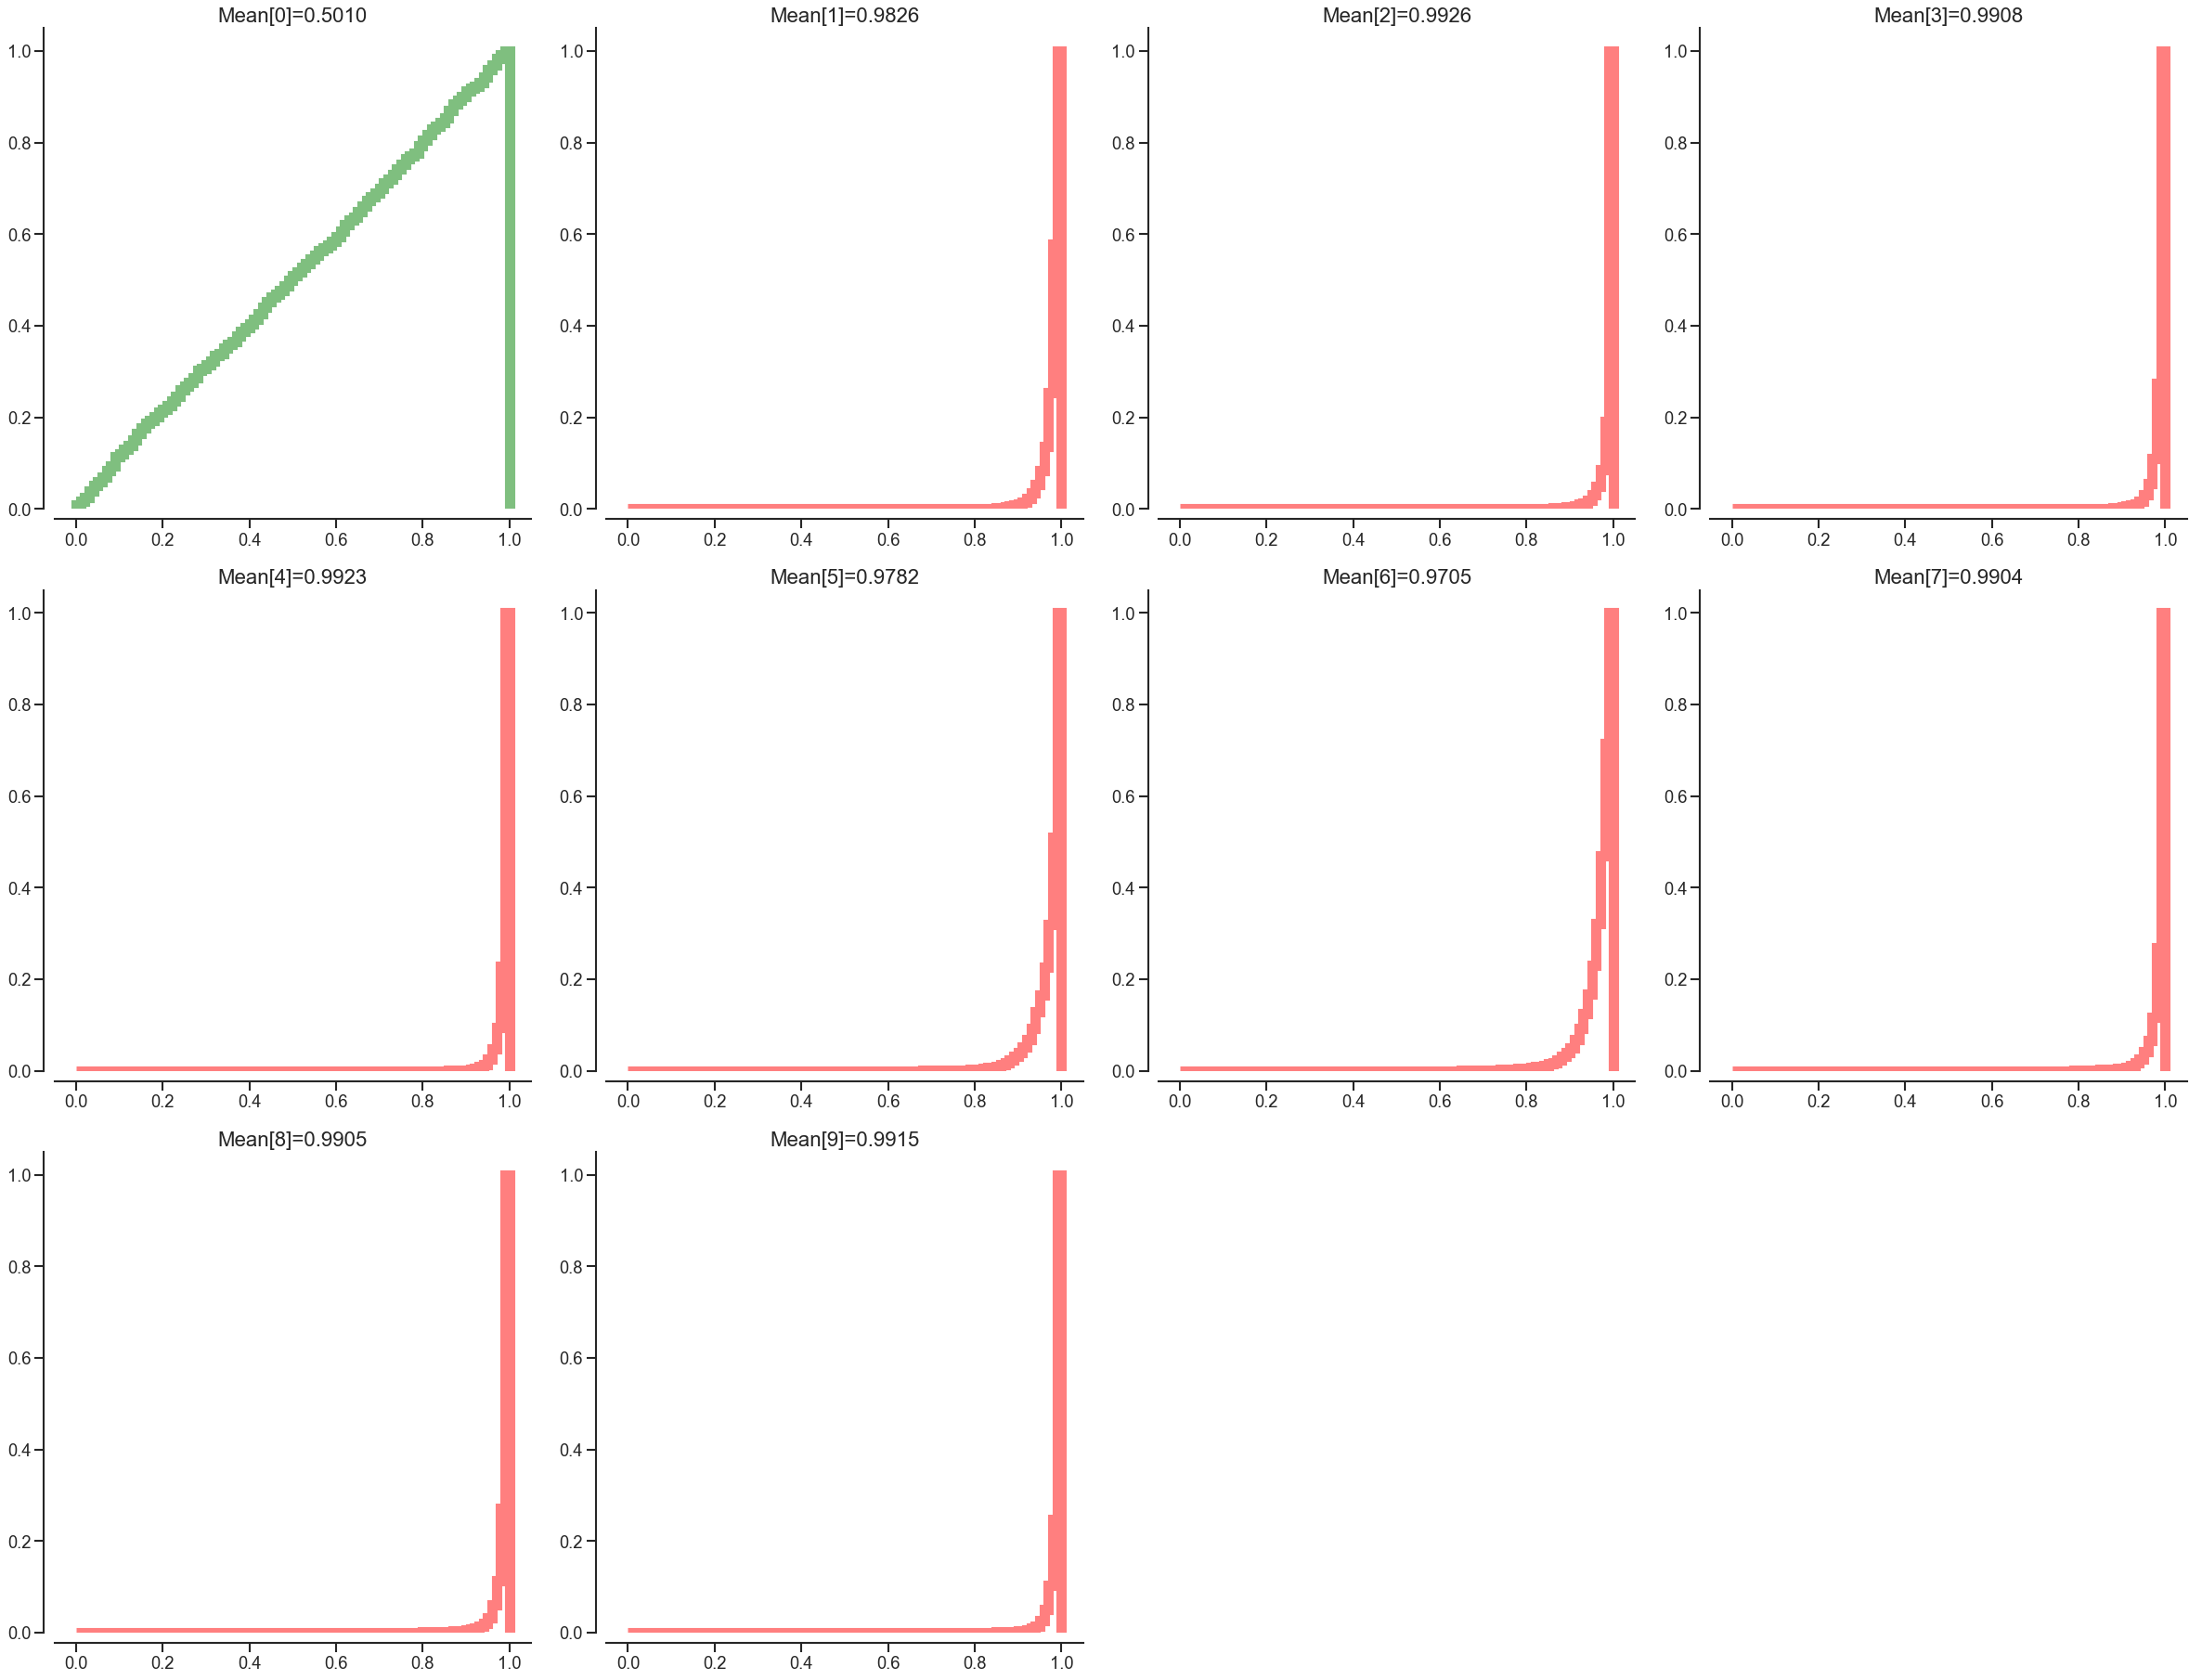

In [89]:
fig=plt.figure(figsize=(30,30),dpi=80)
#ind=['1','2','3','4','6','7','8','9']
ax = None
bins = np.arange(0, 1.01, 0.01)
for i in range(10):
    errors=test_error_per[i]
    ax=fig.add_subplot(4,4,i+1, sharex=ax, sharey=ax)
    color = "red"
    if i in kno:
        color = "green"
    errors_cdf = extreme_dist.cdf(errors)
    ax.hist(
        errors_cdf, bins, cumulative=True, density=True,
        edgecolor=color, linewidth=10, histtype="step", alpha=0.5
    )
    ax.set_title(f"Mean[{i}]={np.mean(errors_cdf):.4f}", fontsize=20)
sns.despine(offset=10)
fig.tight_layout()

In [90]:
#Accuracy Calculation
bins = np.arange(0, 1.01, 0.01)
total_target=[]
total_pred=[]
for i in range(10):
    errors=test_error_per[i]
    l=len(errors)
    target=np.ones(l)
    if i not in kno:
        target = target * 0
    total_target=np.concatenate((total_target,target))
    #ax=fig.add_subplot(4,4,i+1, sharex=ax, sharey=ax)
    #color = "red"
    #if i in kno:
    #    color = "green"
    errors_cdf = np.array(extreme_dist.cdf(errors))
    
    prediction = errors_cdf < 0.50 
    prediction = prediction.astype(np.int)
    total_pred=np.concatenate((total_pred,prediction))
    
    #ax.hist(
    #    errors_cdf, bins, cumulative=True, density=True,
    #    edgecolor=color, linewidth=10, histtype="step", alpha=0.5
    #)
    #ax.set_title(f"Mean[{i}]={np.mean(errors_cdf):.4f}", fontsize=20)
sns.despine(offset=10)
fig.tight_layout()
total_target=np.array(total_target)
total_target.flatten()
total_pred=np.reshape(total_pred,-1)
print("targets")
print(total_target.shape)
print("predictions")
print(total_pred.shape)


targets
(64077,)
predictions
(64077,)


In [91]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(total_target,total_pred)
acc=accuracy_score(total_target,total_pred)
cl_rpt= classification_report(total_target,total_pred)
print("Accuracy = ", acc)
print(cl_rpt)

Accuracy =  0.9923061316853161
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00     63097
        1.0       1.00      0.50      0.66       980

avg / total       0.99      0.99      0.99     64077



In [92]:
#Accuracy Calculation
bins = np.arange(0, 1.01, 0.01)
total_target1=[]
total_pred1=[]
for i in range(10):
    errors=test_error_per[i]
    l=len(errors)
    target=np.ones(l)
    if i not in kno:
        target = target * 0
    total_target1=np.concatenate((total_target1,target))
    #ax=fig.add_subplot(4,4,i+1, sharex=ax, sharey=ax)
    #color = "red"
    #if i in kno:
    #    color = "green"
    #errors_cdf = np.array(extreme_dist.cdf(errors))
    
    prediction1 = errors < 0.021
    prediction1 = prediction1.astype(np.int)
    total_pred1=np.concatenate((total_pred1,prediction1))
    
    #ax.hist(
    #    errors_cdf, bins, cumulative=True, density=True,
    #    edgecolor=color, linewidth=10, histtype="step", alpha=0.5
    #)
    #ax.set_title(f"Mean[{i}]={np.mean(errors_cdf):.4f}", fontsize=20)
sns.despine(offset=10)
fig.tight_layout()
total_target1=np.array(total_target1)
total_target1.flatten()
total_pred1=np.reshape(total_pred1,-1)
print("targets")
print(total_target1.shape)
print("predictions")
print(total_pred1.shape)


targets
(64077,)
predictions
(64077,)


In [93]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(total_target1,total_pred1)
acc=accuracy_score(total_target1,total_pred1)
cl_rpt= classification_report(total_target1,total_pred1)
print("Accuracy = ", acc)
print(cl_rpt)

Accuracy =  0.9929771993070836
             precision    recall  f1-score   support

        0.0       0.99      1.00      1.00     63097
        1.0       1.00      0.54      0.70       980

avg / total       0.99      0.99      0.99     64077



In [94]:
a=0
for i in range(10):
   a+=train_error_per[i].shape[0]

In [95]:
a

5923

In [96]:
extreme_dist.cdf(0.021)

0.5489482946807572

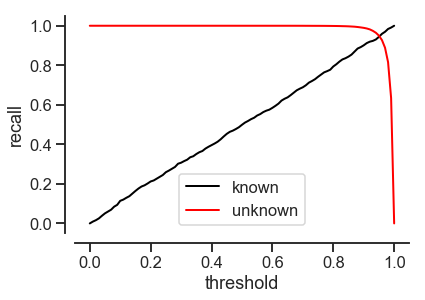

In [97]:
x1=[]
x2=[]
for i in range(10):
    errors=test_error_per[i]
    if i not in kno:
        x2=np.concatenate((x2,errors))
    else :
        x1=np.concatenate((x1,errors))
#x1 = dist1.rvs(N)
#x2 = dist2.rvs(N)
x = np.concatenate((x1, x2))
x_min, x_max = np.min(x), np.max(x)
bins = np.arange(x_min, x_max+1)
bins = np.arange(0, 1, 0.01)
x1_cdf = extreme_dist.cdf(x1)
x2_cdf = extreme_dist.cdf(x2)
acc_1 = []
acc_2 = []
threshholds = np.arange(0, 1.01, 0.01)
for threshhold in threshholds:
  acc_1.append(accuracy_score(np.ones_like(x1_cdf), x1_cdf <= threshhold))
  acc_2.append(accuracy_score(np.ones_like(x2_cdf), x2_cdf > threshhold))
  
plt.plot(threshholds, acc_1, color="k", lw=2, label="known")
plt.plot(threshholds, acc_2, color="r", lw=2, label="unknown")
plt.xlabel("threshold")
plt.ylabel("recall")
plt.legend()
sns.despine(offset=10)

In [98]:
N = 5000
l=len(kno)
alpha = np.linspace(0.1,0.9,9)
acc=[]
rec_1=[]
rec_2=[]
for a in alpha:
    n1=(1-a)*N     #Known Points
    n2=a*N #Unknown Points
    x1 = []
    x2 = []
    y1 = []
    y2 = []
    for i in range(10):
        errors=test_error_per[i]
        
        if i not in kno:
            ind = np.random.choice(len(errors),int(n2//(10-l)))
            x2  = np.concatenate((x2,errors[ind]))
            y2  = np.concatenate((y2,np.ones(int(n2//(10-l)))))
            #print(l,n1,n2,len(ind))
        else :
            ind = np.random.choice(len(errors),int(n1//l))
            x1  = np.concatenate((x1,errors[ind]))
            y1  = np.concatenate((y1,np.zeros(int(n1//l))))
            #print(l,n1,n2,len(ind),"Known")
    
    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))
    #print(len(y))
    x_min, x_max = np.min(x), np.max(x)
    bins = np.arange(x_min, x_max+1)
    bins = np.arange(0, 1, 0.01)
    x1_cdf = extreme_dist.cdf(x1)
    x2_cdf = extreme_dist.cdf(x2)
    x_cdf = np.concatenate((x1_cdf,x2_cdf))
    thresholds = np.arange(0, 1.01, 0.01)
    acc_alpha=[]
    rec_alpha_1=[]
    rec_alpha_2=[]
    temp1=x1_cdf
    temp2=x2_cdf
    for threshold in thresholds:
        acc_alpha.append(accuracy_score( y , x_cdf > threshold ))
        rec_alpha_1.append(accuracy_score( np.ones_like(x1_cdf) , x1_cdf <= threshold ))
        rec_alpha_2.append(accuracy_score( np.ones_like(x2_cdf) , x2_cdf >  threshold ))
    acc.append(acc_alpha)
    rec_1.append(rec_alpha_1)
    rec_2.append(rec_alpha_2)
thresh = thresholds        

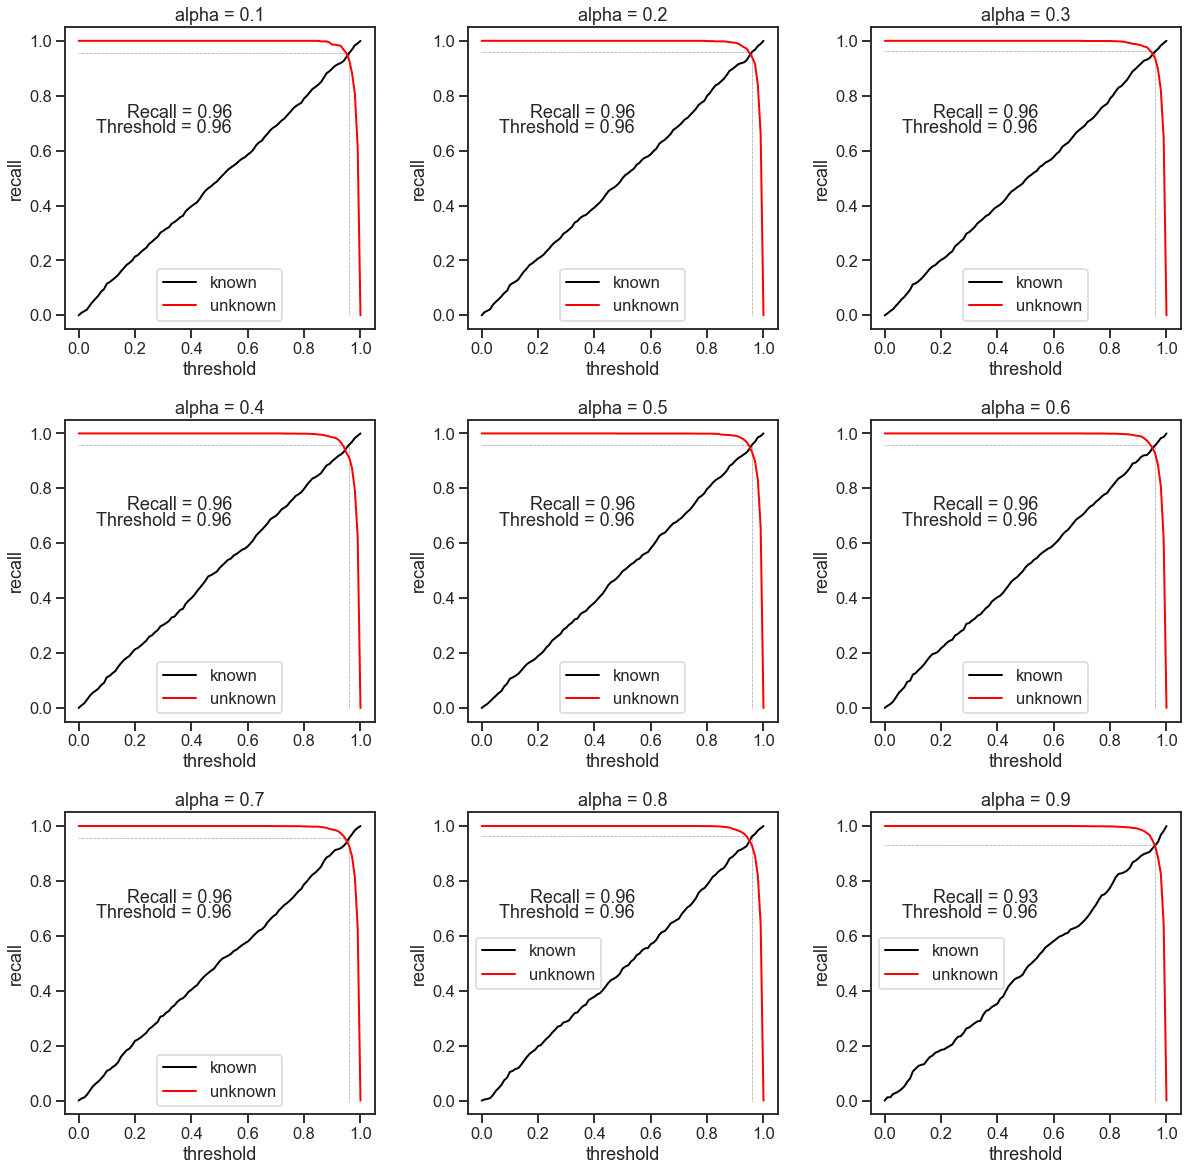

In [103]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.3, wspace=0.3)#w is horizontal h is vertical
p_i=[]
for i in range(len(alpha)):
    rc1=rec_1[i]
    rc2=rec_2[i]
    l1=len(rc1)
    for j in range(len(rc1)):
        if np.abs(rc1[j] - rc2[j])<0.001:
            p=j
    p_i.append(p)
    alpha1=alpha[i]
    ax = fig.add_subplot(3,3,i+1,sharex=ax,sharey=ax)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.plot(thresh, rc1, color="k", lw=2, label="known")
    ax.plot(thresh, rc2, color="r", lw=2, label="unknown")
    ax.hlines(y=rc1[p],xmin=0,xmax=thresh[p],lw=0.5,linestyles='dotted')
    ax.vlines(x=thresh[p],ymin=0,ymax=rc1[p],lw=0.5,linestyles='dotted')
    ax.text(0.2,0.7,'Recall = %.2f' % rc1[p],transform=ax.transAxes)
    ax.text(0.1,0.65,'Threshold = %.2f' % thresh[p] ,transform=ax.transAxes)
    ax.set(xlabel='threshold',ylabel='recall')
    ax.legend()
    ax.title.set_text("alpha = "+str((i+1)/10))

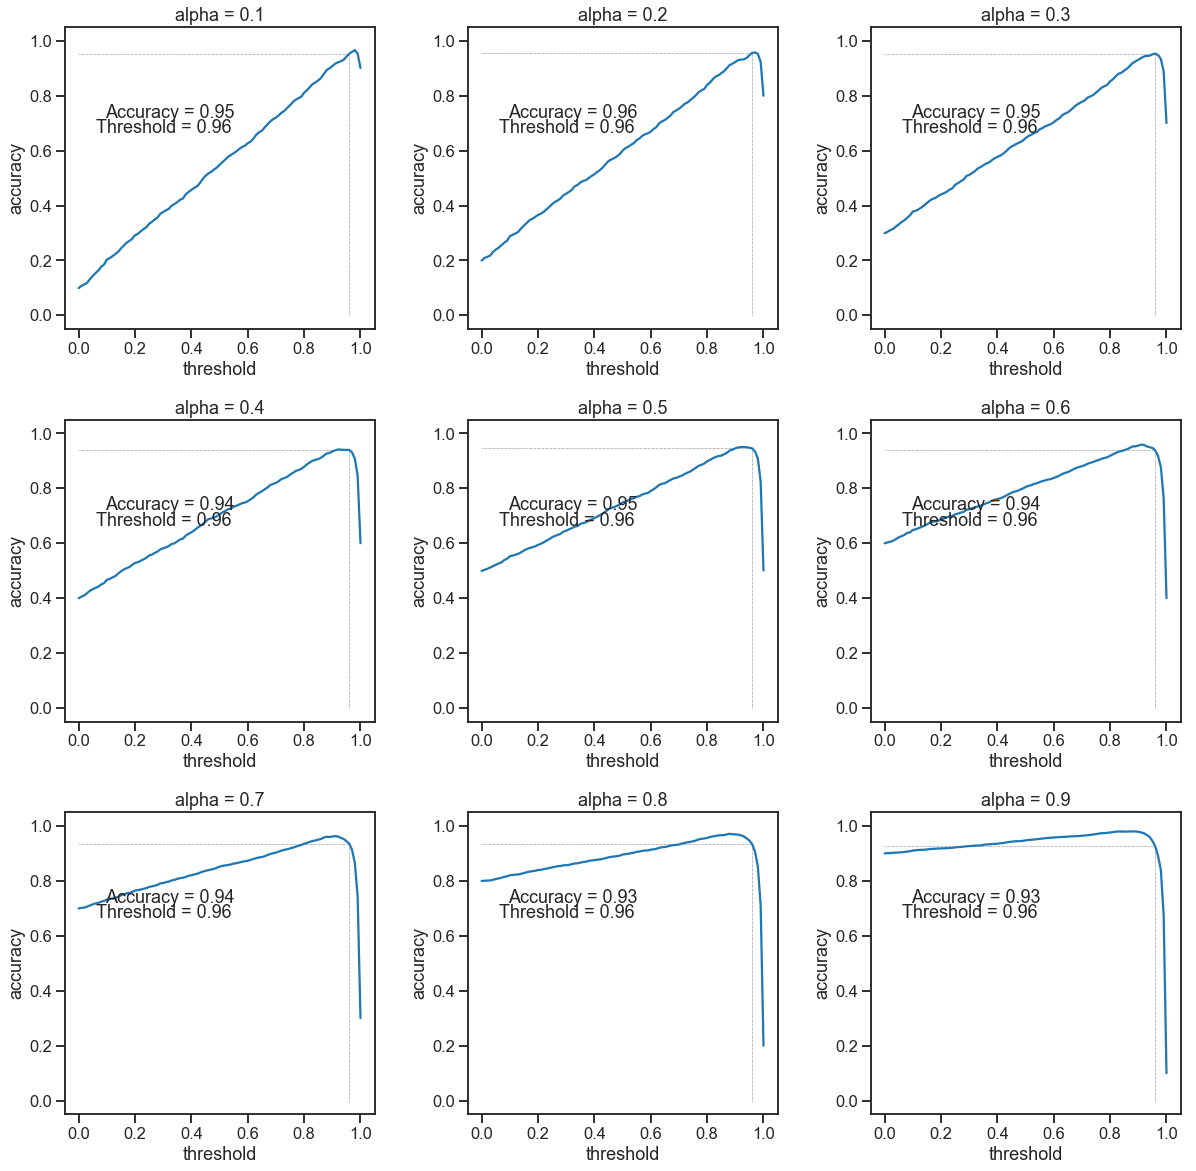

In [104]:
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=0.3, wspace=0.3)#w is horizontal h is vertical
for i in range(len(alpha)):
    ac1=acc[i]
    alpha1=alpha[i]
    ax = fig.add_subplot(3,3,i+1,sharex=ax,sharey=ax)
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.plot(thresh,ac1)
    ax.hlines(y=ac1[p],xmin=0,xmax=thresh[p],lw=0.5,linestyles='dotted')
    ax.vlines(x=thresh[p],ymin=0,ymax=ac1[p],lw=0.5,linestyles='dotted')
    ax.text(0.13,0.7,'Accuracy = %.2f' % ac1[p],transform=ax.transAxes)
    ax.text(0.1,0.65,'Threshold = %.2f' % thresh[p] ,transform=ax.transAxes)
    ax.set(xlabel='threshold',ylabel='accuracy')
    ax.title.set_text("alpha = "+str((i+1)/10))

In [101]:
rec_1

[[0.0,
  0.009333333333333334,
  0.015333333333333332,
  0.021555555555555557,
  0.03666666666666667,
  0.049777777777777775,
  0.06088888888888889,
  0.072,
  0.08688888888888889,
  0.09555555555555556,
  0.11533333333333333,
  0.12133333333333333,
  0.12933333333333333,
  0.13777777777777778,
  0.1471111111111111,
  0.16044444444444445,
  0.17177777777777778,
  0.1837777777777778,
  0.19111111111111112,
  0.2,
  0.21422222222222223,
  0.21933333333333332,
  0.22977777777777778,
  0.2388888888888889,
  0.24622222222222223,
  0.26022222222222224,
  0.2682222222222222,
  0.2777777777777778,
  0.2857777777777778,
  0.3011111111111111,
  0.30777777777777776,
  0.31533333333333335,
  0.32066666666666666,
  0.3337777777777778,
  0.34,
  0.348,
  0.35733333333333334,
  0.3626666666666667,
  0.37955555555555553,
  0.3888888888888889,
  0.3973333333333333,
  0.4048888888888889,
  0.412,
  0.42488888888888887,
  0.4408888888888889,
  0.45444444444444443,
  0.4633333333333333,
  0.47,
  0.479777

In [102]:
a[b]

NameError: name 'b' is not defined

In [ ]:
t=test_error_per[0]
len(t)

In [ ]:
it=np.random.choice(len(t),100)
it

In [ ]:
plt.plot(temp1)

In [ ]:
plt.plot(temp2)

In [ ]:
a=[]
for threshold in thresh:
    a.append(accuracy_score(np.ones_like(temp1),temp1 <=threshold))
plt.plot(a)

In [ ]:
print(temp1,i1)

In [ ]:
i1=[1, 1, 1, 1]
i2=[True, False, True, False]
accuracy_score(i1,i2)

In [ ]:
rec_1[8]